# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import gensim

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spam = pd.read_csv('spam.csv')

In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
spam['v1'] = spam['v1'].replace(['ham','spam'],[0,1])

<Axes: >

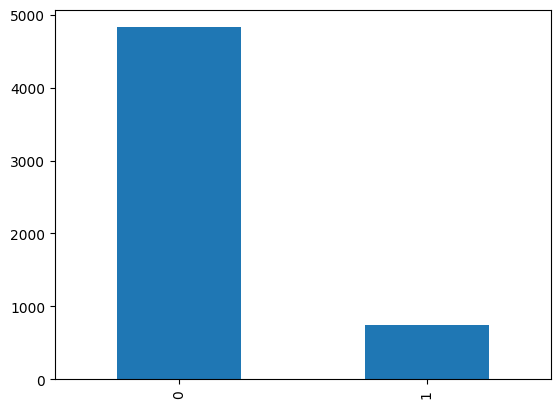

In [6]:
spam['v1'].value_counts().plot(kind='bar')

In [7]:
spam.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4825
1,1,747


In [8]:
print(f'정상 메일 {round(spam["v1"].value_counts()[0]/len(spam) * 100,3)}%')
print(f'스팸 메일 {round(spam["v1"].value_counts()[1]/len(spam) * 100,3)}%')

정상 메일 86.594%
스팸 메일 13.406%


## Tokenizing


In [9]:
import nltk

In [10]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [11]:
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize

In [12]:
print(word_tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


## Embedding

One-hot Encoding

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts([spam.iloc[5]['v2']])
print(tokenizer.word_index)

encoded = tokenizer.texts_to_sequences([spam.iloc[5]['v2']])[0]
print(encoded)

one_hot = to_categorical(encoded)
print(one_hot)

{'to': 1, 'freemsg': 2, 'hey': 3, 'there': 4, 'darling': 5, "it's": 6, 'been': 7, '3': 8, "week's": 9, 'now': 10, 'and': 11, 'no': 12, 'word': 13, 'back': 14, "i'd": 15, 'like': 16, 'some': 17, 'fun': 18, 'you': 19, 'up': 20, 'for': 21, 'it': 22, 'still': 23, 'tb': 24, 'ok': 25, 'xxx': 26, 'std': 27, 'chgs': 28, 'send': 29, 'å£1': 30, '50': 31, 'rcv': 32}
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 1, 29, 30, 31, 1, 32]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


CBOW, Skip-gram


In [14]:
result = [text_to_word_sequence(sentence) for sentence in spam['v2']]

In [15]:
for line in result[:3]:
    print(line)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', "c's", 'apply', "08452810075over18's"]


In [17]:
CBOW_model = gensim.models.Word2Vec(sentences=result, window=3, min_count=3, workers=4, sg=0)

In [18]:
CBOW_model.wv.vectors.shape

(2986, 100)

In [23]:
CBOW_model_result = CBOW_model.wv.most_similar("food")
print(CBOW_model_result)

[('person', 0.99887615442276), ('v', 0.9988585114479065), ('even', 0.9987571239471436), ('some', 0.9987516403198242), ('also', 0.9987220168113708), ('someone', 0.9987030029296875), ('coming', 0.9987027645111084), ('being', 0.998693585395813), ('no', 0.9986884593963623), ('other', 0.9986751079559326)]


In [22]:
SG_model = gensim.models.Word2Vec(sentences=result, window=3, min_count=3, workers=4, sg=1)
SG_model_result = SG_model.wv.most_similar("food")
print(SG_model_result)

[('pretty', 0.9973654747009277), ('making', 0.9972992539405823), ('fun', 0.9972659945487976), ('though', 0.9972606897354126), ('off', 0.9969716668128967), ('smiling', 0.9968134760856628), ('made', 0.9966632723808289), ('means', 0.9966241121292114), ('meant', 0.9965362548828125), ('yesterday', 0.9964916706085205)]


In [24]:
SG_model.wv.vectors.shape

(2986, 100)

## 해석

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spam['v2'], spam['v1'], test_size=0.2, stratify=spam['v1'])

In [26]:
print(f'정상 메일 {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

정상 메일 86.583%
스팸 메일 13.417%


In [27]:
print(f'정상 메일 {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

정상 메일 86.637%
스팸 메일 13.363%


In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In [31]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'is': 8, 'in': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, 'that': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'or': 25, 'not': 26, 'do': 27, 'can': 28, 'if': 29, "i'm": 30, 'at': 31, 'be': 32, 'get': 33, 'ur': 34, 'just': 35, 'will': 36, 'with': 37, 'no': 38, 'gt': 39, 'this': 40, 'lt': 41, '4': 42, 'we': 43, 'up': 44, 'when': 45, 'ok': 46, 'free': 47, 'out': 48, 'what': 49, 'go': 50, 'how': 51, 'from': 52, 'all': 53, 'know': 54, 'like': 55, 'was': 56, 'got': 57, 'then': 58, 'good': 59, 'come': 60, 'its': 61, 'day': 62, 'time': 63, 'love': 64, 'only': 65, 'there': 66, 'he': 67, 'am': 68, 'text': 69, 'want': 70, 'send': 71, 'as': 72, 'txt': 73, 'one': 74, 'r': 75, 'sorry': 76, 'going': 77, 'about': 78, 'by': 79, 'stop': 80, "i'll": 81, 'home': 82, 'she': 83, 'need': 84, 'lor': 85, 'see': 86, 'n': 87, 'reply': 88, "don't": 89, 'back': 90, 'tell': 91, 'her':

In [33]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 1번인 희귀 단어의 수: %s' %( rare_cnt))
print("단어 집합서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번인 희귀 단어의 수: 4027
단어 집합서 희귀 단어의 비율: 51.17549879273097
희귀 단어 등장 빈도 비율: 5.688736950656175


In [36]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기' ,vocab_size)

단어 집합의 크기 7870


메일의 최대 길이 : 189
메일의 평균 길이 : 15.813103


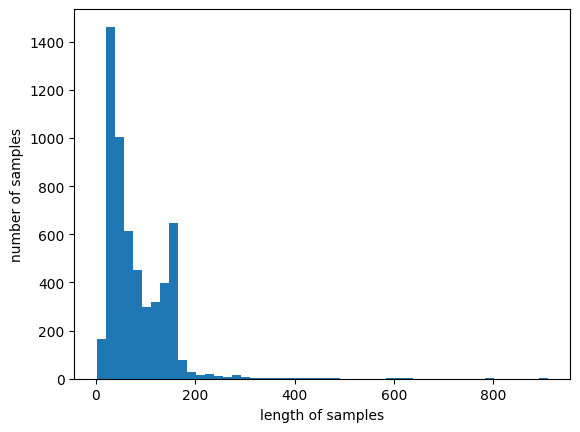

In [ ]:
print('메일의 최대 길이 : %d' % max((len(sample)) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

plt.hist([len(sample) for sample in spam['v2']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [41]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("훈련 데이터", X_train_padded.shape)
print("검증 데이터", X_test_padded.shape)

훈련 데이터 (4457, 189)
검증 데이터 (1115, 189)


LSTM을 이용한 스팸 데이터 이진 분류

In [37]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(4000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_check = ModelCheckpoint('the_best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=1, batch_size=64, callbacks=[early_stop, model_check])

70/70 [==============================] - ETA: 0s - loss: 0.3813 - acc: 0.8777
Epoch 1: val_acc improved from -inf to 0.93901, saving model to the_best.h5
70/70 [==============================] - 14s 137ms/step - loss: 0.3813 - acc: 0.8777 - val_loss: 0.1727 - val_acc: 0.9390


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
print("정확도 %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

35/35 [==============================] - 0s 7ms/step - loss: 0.1727 - acc: 0.9390
정확도 0.9390


validation데이터에서 0.94의 정확도를 얻었다.